In [ ]:
!pip install scanpy

In [ ]:
import scanpy as sc
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import svm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%load_ext autoreload
%autoreload 2
from google.colab import drive
import os
gdrive_path='/content/gdrive/MyDrive/Masterpraktikum'
drive.mount('/content/gdrive', force_remount=True)
os.chdir(gdrive_path)

Mounted at /content/gdrive


# ML Metric

* [I. Goal](#goal)
* [II. Positive and Negative Controls (HUVEC)](#pncs)
  * [A. SVM](#svm1)
  * [B. Logistic Regression](#lr1)
* [III. Whole HUVEC Dataset](#whole)
  * [A. SVM](#svm2)
  * [B. Logistic Regression](#lr2)
    

## I. Goal  <a class="anchor" id="goal"></a>

*What is our goal?* <br>

-> We want to train ML models before and after integration <br>
1. Classification of the 38 PCs and the negative control, i.e. 39 classes <br>
2. Classification of the 1138 siRNAs and the negative control, i.e. 1139 classes <br>

Let's have a quick look at the data again:

In [ ]:
adata = sc.read_csv("/content/gdrive/MyDrive/Masterpraktikum/Data/embeddings.csv")
meta = pd.read_csv("/content/gdrive/MyDrive/Masterpraktikum/Data/metadata.csv", index_col = 0)
# change the order of the rows in the meta data to match the order in the embeddings
meta = meta.reindex(pd.read_csv("/content/gdrive/MyDrive/Masterpraktikum/Data/embeddings.csv", index_col = 0).index)
adata.obs = meta
adata.obs['well_row'], adata.obs['well_column'] = adata.obs['well'].str[:1], adata.obs['well'].str[1:]
huvec = adata[adata.obs["cell_type"] == "HUVEC"]
huvec.obs["sirna_well_type"] = np.where(huvec.obs.well_type ==  "treatment", "treatment", huvec.obs.sirna)
print(huvec)

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'well_row', 'well_column', 'sirna_well_type'


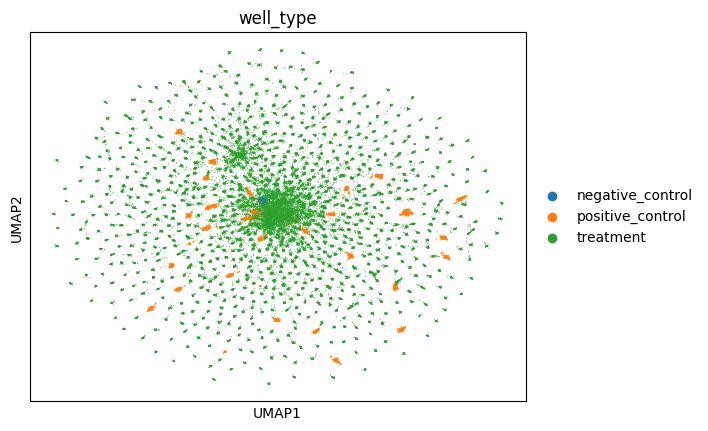

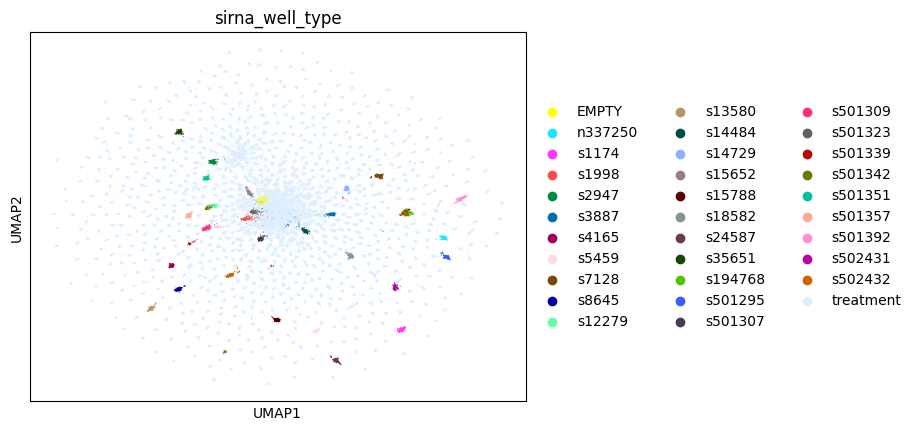

In [ ]:
sc.pp.neighbors(huvec, n_neighbors=15, use_rep = "X")
sc.tl.umap(huvec)
sc.pl.umap(huvec, color="well_type")
sc.pl.umap(huvec, color="sirna_well_type")

## II. Positive and Negative Controls  <a class="anchor" id="pncs"></a>


Performance metrics:

    - Balanced Accuracy
    - Precision
    - Recall
    

<font size="4"> **<u> A.  SVM </u>** </font> <a class="anchor" id="svm1"></a>


**Unintegrated data** <a class="anchor" id="svm1"></a>

In [70]:
adata = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Data/rxrx1_huvec.h5ad")
adata

AnnData object with n_obs × n_vars = 5982 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'well_row', 'well_column'

In [71]:
X_train, X_test, y_train, y_test = train_test_split(adata.X, list(adata.obs["sirna"]), test_size=0.2, random_state=42)

In [72]:
print(len(X_train))
print(len(X_test))

4785
1197


In [73]:
#fit model
clf = svm.SVC().fit(X_train, y_train)

In [74]:
y_train_pred = clf.predict(X_train)

In [76]:
# performance on the training set:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = "weighted")))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = "weighted")))

Confusion matrix: 
[[195   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 139   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 143   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0 155   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 144   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 158   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 149   0   0   0   0   0   0   0   0   0   0
    

In [77]:
y_test_pred = clf.predict(X_test)

In [78]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[55  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 

**Harmony**

In [79]:
huvec_harmony = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/PosCtrls_NegCtrls/harmony.h5ad")
huvec_harmony

AnnData object with n_obs × n_vars = 5982 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'well_row', 'well_column', 'cluster'
    uns: 'leiden', 'louvain', 'neighbors', 'pca', 'sirna_colors', 'umap'
    obsm: 'X_emb', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [80]:
X_train, X_test, y_train, y_test = train_test_split(huvec_harmony.obsm["X_emb"], list(huvec_harmony.obs["sirna"]), test_size=0.2, random_state=42)
#fit model
clf = svm.SVC().fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
# performance on the training set:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = "weighted")))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = "weighted")))
y_test_pred = clf.predict(X_test)
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[195   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 154   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 139   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 140   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0 155   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0 142   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 158   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 149   0   0   0   0   0   0   0   0   0   0
    

**Scanorama**

In [82]:
huvec_scanorama = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/PosCtrls_NegCtrls/scanorama.h5ad")
huvec_scanorama

AnnData object with n_obs × n_vars = 5982 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'well_row', 'well_column', 'cluster'
    uns: 'louvain', 'neighbors', 'sirna_colors', 'umap'
    obsm: 'X_emb', 'X_pca', 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'

In [83]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scanorama.obsm["X_scanorama"], list(huvec_scanorama.obs["sirna"]), test_size=0.2, random_state=42)
#fit model
clf = svm.SVC().fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
# performance on the training set:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = "weighted")))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = "weighted")))
y_test_pred = clf.predict(X_test)
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[200   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 167   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 150   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 140   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  10   0   0   0   0   0   0   0   0]
 [  0   0   0   0 160   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0 145   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 154   0   0   0   0   0   0   0   0   0   0
    

**scANVI**

In [84]:
huvec_scanvi = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/PosCtrls_NegCtrls/scanvi.h5ad")
huvec_scanvi

AnnData object with n_obs × n_vars = 5982 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'well_row', 'well_column', 'cluster'
    uns: 'leiden', 'louvain', 'neighbors', 'pca', 'sirna_colors', 'umap'
    obsm: 'X_emb', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [85]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scanvi.obsm["X_emb"], list(huvec_scanvi.obs["sirna"]), test_size=0.2, random_state=42)
#fit model
clf = svm.SVC().fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
# performance on the training set:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = "weighted")))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = "weighted")))
y_test_pred = clf.predict(X_test)
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[195   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 139   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 142   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0 155   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 144   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 158   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 149   0   0   0   0   0   0   0   0   0   0
    

**scVI**

In [86]:
huvec_scvi = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/PosCtrls_NegCtrls/scvi.h5ad")
huvec_scvi

AnnData object with n_obs × n_vars = 5982 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'well_row', 'well_column', 'cluster'
    uns: 'leiden', 'louvain', 'neighbors', 'pca', 'sirna_colors', 'umap'
    obsm: 'X_emb', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [87]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scvi.obsm["X_emb"], list(huvec_scvi.obs["sirna"]), test_size=0.2, random_state=42)
#fit model
clf = svm.SVC().fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
# performance on the training set:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = "weighted")))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = "weighted")))
y_test_pred = clf.predict(X_test)
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[195   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 154   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 135   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   4]
 [  0   0   0  95   0   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0  49   0   0   1   0   0   0   0   0]
 [  0   0   0   0 155   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0 140   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 154   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   4]
 [  1   0   0   0   0   0   0 136   0   0   0   8   0   0   0   0   0   0
    

**scGEN**

In [88]:
huvec_scgen = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/PosCtrls_NegCtrls/scgen.h5ad")
huvec_scgen

AnnData object with n_obs × n_vars = 5982 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'well_row', 'well_column', '_scvi_batch', '_scvi_labels', 'cluster'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'louvain', 'neighbors', 'sirna_colors', 'umap'
    obsm: 'X_emb', 'X_umap', 'corrected_latent', 'latent'
    obsp: 'connectivities', 'distances'

In [89]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scgen.obsm["corrected_latent"], list(huvec_scgen.obs["sirna"]), test_size=0.2, random_state=42)
#fit model
clf = svm.SVC().fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
# performance on the training set:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = "weighted")))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = "weighted")))
y_test_pred = clf.predict(X_test)
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[195   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 139   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 155   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 144   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 158   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 149   0   0   0   0   0   0   0   0   0   0
    

<font size="4"> **<u> B.  Logistic Regression </u>** </font> <a class="anchor" id="lr1"></a>


**Unintegrated data**

In [90]:
adata = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Data/rxrx1_huvec.h5ad")
adata

AnnData object with n_obs × n_vars = 5982 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'well_row', 'well_column'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(adata.X, list(adata.obs["sirna"]), test_size=0.2, random_state=42)
#fit model
clf = svm.SVC().fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
# performance on the training set:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = "weighted")))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = "weighted")))
y_test_pred = clf.predict(X_test)
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[195   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 139   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 155   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 144   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 158   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 149   0   0   0   0   0   0   0   0   0   0
    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Precision: 0.996457351546984
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-91-aa0e24fb4ac0>", line 10, in <cell line: 10>
    y_test_pred = clf.predict(X_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 820, in predict
    y = super().predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 433, in predict
    X = self._validate_for_predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 613, in _validate_for_predict
    X = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 588, in _validate_data
    self._check_n_features(X, reset=reset)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 389, in _check_n_features
    raise ValueError(
ValueError: X has 128 featur

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-91-aa0e24fb4ac0>", line 10, in <cell line: 10>
    y_test_pred = clf.predict(X_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 820, in predict
    y = super().predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 433, in predict
    X = self._validate_for_predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 613, in _validate_for_predict
    X = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 588, in _validate_data
    self._check_n_features(X, reset=reset)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 389, in _check_n_features
    raise ValueError(
ValueError: X has 128 features, but SVC is expecting 100 

## III. Whole HUVEC Dataset <a class="anchor" id="whole"></a>

Performance metrics:

    - Balanced Accuracy
    - Precision
    - Recall
    

<font size="4"> **<u> A.  SVM </u>** </font> <a class="anchor" id="svm2"></a>


**Unintegrated data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec.X, list(huvec.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

47240
11810


In [ ]:
#fit model
clf = svm.SVC().fit(X_train, y_train)

In [ ]:
y_train_pred = clf.predict(X_train)

In [ ]:
# performance on the training set:
#y_train_pred = clf.predict(X_train)
#print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred)))
print("Precision: " + str(precision_score(y_train, y_train_pred)))

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[48  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0  4]]
Balanced Accuracy: 0.9728227192922039
Recall: 0.9730736663844199
Precision: 0.9757601605180998


**Harmony**

In [ ]:
huvec_harmony = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Whole_HUVEC/harmony.h5ad")
huvec_harmony

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'cluster'
    uns: 'experiment_colors', 'leiden', 'louvain', 'neighbors', 'pca', 'umap', 'well_type_colors'
    obsm: 'X_emb', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec_harmony.obsm["X_emb"], list(huvec_harmony.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

47240
11810


In [ ]:
#fit model
clf = svm.SVC().fit(X_train, y_train)

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[49  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0  5]]
Balanced Accuracy: 0.9674859378349449
Recall: 0.9686706181202371
Precision: 0.9718662599726243


In [ ]:
confusion_matrix(y_test, y_test_pred).shape

(1139, 1139)

**Scanorama**

In [ ]:
huvec_scanorama = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Whole_HUVEC/scanorama.h5ad")
huvec_scanorama

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id'
    obsm: 'X_emb', 'X_scanorama'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scanorama.obsm["X_scanorama"], list(huvec_scanorama.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

47240
11810


In [ ]:
#fit model
clf = svm.SVC().fit(X_train, y_train)

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[42  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 15  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0  6]]
Balanced Accuracy: 0.8747119456193614
Recall: 0.87883149872989
Precision: 0.8907764299742279


**scANVI**

In [ ]:
huvec_scanvi = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Whole_HUVEC/scanvi.h5ad")
huvec_scanvi

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'cluster'
    uns: 'experiment_colors', 'louvain', 'neighbors', 'umap', 'well_type_colors'
    obsm: 'X_emb', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scanvi.obsm["X_emb"], list(huvec_scanvi.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

47240
11810


In [ ]:
#fit model
clf = svm.SVC().fit(X_train, y_train)

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[45  0  0 ...  0  0  0]
 [ 0 37  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0 31  0]
 [ 0  0  0 ...  0  0  3]]
Balanced Accuracy: 0.5689804397415545
Recall: 0.5853513971210839
Precision: 0.6346988821112501


**scVI**

In [ ]:
huvec_scvi = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Whole_HUVEC/scvi.h5ad")
huvec_scvi

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'cluster'
    uns: 'experiment_colors', 'louvain', 'neighbors', 'umap', 'well_type_colors'
    obsm: 'X_emb', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scvi.obsm["X_emb"], list(huvec_scvi.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

47240
11810


In [ ]:
#fit model
clf = svm.SVC().fit(X_train, y_train)

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[42  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0  3]]
Balanced Accuracy: 0.6442685972609208
Recall: 0.6555461473327688
Precision: 0.6815688098223188


**scGEN**

In [ ]:
huvec_scgen = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Whole_HUVEC/scgen.h5ad")
huvec_scgen

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', '_scvi_batch', '_scvi_labels', 'cluster'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'experiment_colors', 'louvain', 'neighbors', 'sirna_colors', 'umap', 'well_type_colors'
    obsm: 'X_emb', 'X_umap', 'corrected_latent', 'latent'
    obsp: 'connectivities', 'distances'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scgen.obsm["corrected_latent"], list(huvec_scgen.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

47240
11810


In [ ]:
#fit model
clf = svm.SVC().fit(X_train, y_train)

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[49  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0  5]]
Balanced Accuracy: 0.9998855987442468
Recall: 0.9998306519898391
Precision: 0.9998492616612854


<font size="4"> **<u> B.  Logistic Regression </u>** </font> <a class="anchor" id="lr2"></a>


**Unintegrated**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec.X, list(huvec.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
#fit model
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
X_test.shape

(11810, 128)

In [ ]:
y_test_pred = lr.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[39  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0  4]]
Balanced Accuracy: 0.9707883678448521
Recall: 0.970787468247248
Precision: 0.9739535951185507


In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = 'weighted')))

Confusion matrix: 
[[201   0   0 ...   0   0   0]
 [  0 152   0 ...   0   0   0]
 [  0   0 152 ...   0   0   0]
 ...
 [  0   0   0 ...  36   0   0]
 [  0   0   0 ...   0 158   0]
 [  0   0   0 ...   0   0  43]]
Balanced Accuracy: 0.9998630276303265
Recall: 0.9995554614733276
Precision: 0.9995578613474337


**Harmony**

In [ ]:
huvec_harmony = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Whole_HUVEC/harmony.h5ad")
huvec_harmony

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'cluster'
    uns: 'experiment_colors', 'leiden', 'louvain', 'neighbors', 'pca', 'umap', 'well_type_colors'
    obsm: 'X_emb', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec_harmony.obsm["X_emb"], list(huvec_harmony.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
#fit model
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_test_pred = lr.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[39  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0  4]]
Balanced Accuracy: 0.9646594621585218
Recall: 0.9649449618966978
Precision: 0.9684682798023534


In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = 'weighted')))

Confusion matrix: 
[[193   0   0 ...   0   0   0]
 [  0 152   0 ...   0   0   0]
 [  0   0 152 ...   0   0   0]
 ...
 [  0   0   0 ...  36   0   0]
 [  0   0   0 ...   0 158   0]
 [  0   0   0 ...   0   0  43]]
Balanced Accuracy: 0.9986938635995152
Recall: 0.9974597798475868
Precision: 0.997505315719709


**Scanorama**

In [ ]:
huvec_scanorama = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Whole_HUVEC/scanorama.h5ad")
huvec_scanorama

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'cluster'
    uns: 'experiment_colors', 'louvain', 'neighbors', 'umap', 'well_type_colors'
    obsm: 'X_emb', 'X_pca', 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scanorama.obsm["X_scanorama"], list(huvec_scanorama.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
#fit model
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_test_pred = lr.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[42  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  0]
 [ 0  0  0 ...  0 39  0]
 [ 0  0  0 ...  0  0  7]]
Balanced Accuracy: 0.8376194873288346
Recall: 0.8403048264182896
Precision: 0.8636998540499671


In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = 'weighted')))

Confusion matrix: 
[[202   0   0 ...   0   0   0]
 [  0 145   0 ...   0   0   0]
 [  0   0 152 ...   0   0   0]
 ...
 [  0   0   0 ...  27   0   0]
 [  0   0   0 ...   0 146   0]
 [  0   0   0 ...   0   0  40]]
Balanced Accuracy: 0.8578313226581255
Recall: 0.8658763759525826
Precision: 0.8792758471131434


**scANVI**

In [ ]:
huvec_scanvi = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Whole_HUVEC/scanvi.h5ad")
huvec_scanvi

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'cluster'
    uns: 'experiment_colors', 'louvain', 'neighbors', 'umap', 'well_type_colors'
    obsm: 'X_emb', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scanvi.obsm["X_emb"], list(huvec_scanvi.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
#fit model
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_test_pred = lr.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[47  0  0 ...  0  0  0]
 [ 4 34  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0  0]]
Balanced Accuracy: 0.02249586712646977
Recall: 0.08154106689246401
Precision: 0.01380908605358429


In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = 'weighted')))

Confusion matrix: 
[[196   0   0 ...   0   0   0]
 [ 17 120   0 ...   0   0   0]
 [  0   0 152 ...   0   0   0]
 ...
 [  3   0   0 ...   0   4   0]
 [  0   0   0 ...   0 156   0]
 [  0   0   0 ...   0   3   0]]
Balanced Accuracy: 0.02224296796815903
Recall: 0.08251481795088908
Precision: 0.014936363854895992


**scVI**

In [ ]:
huvec_scvi = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Whole_HUVEC/scvi.h5ad")
huvec_scvi

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', 'cluster'
    uns: 'experiment_colors', 'louvain', 'neighbors', 'umap', 'well_type_colors'
    obsm: 'X_emb', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scvi.obsm["X_emb"], list(huvec_scvi.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
#fit model
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_test_pred = lr.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[49  0  0 ...  0  0  0]
 [40  0  0 ...  0  0  0]
 [40  0  0 ...  0  0  0]
 ...
 [12  0  0 ...  0  0  0]
 [34  0  0 ...  0  0  0]
 [ 5  0  0 ...  0  0  0]]
Balanced Accuracy: 0.000877963125548727
Recall: 0.004149026248941575
Precision: 1.7214418814406195e-05


In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = 'weighted')))

Confusion matrix: 
[[201   0   0 ...   0   0   0]
 [152   0   0 ...   0   0   0]
 [152   0   0 ...   0   0   0]
 ...
 [ 36   0   0 ...   0   0   0]
 [158   0   0 ...   0   0   0]
 [ 43   0   0 ...   0   0   0]]
Balanced Accuracy: 0.000877963125548727
Recall: 0.004254868755292125
Precision: 1.810390812476116e-05


**scGEN**

In [ ]:
huvec_scgen = sc.read_h5ad("/content/gdrive/MyDrive/Masterpraktikum/Whole_HUVEC/scgen.h5ad")
huvec_scgen

AnnData object with n_obs × n_vars = 59050 × 128
    obs: 'well_id', 'cell_type', 'dataset', 'experiment', 'plate', 'well', 'site', 'well_type', 'sirna', 'sirna_id', '_scvi_batch', '_scvi_labels', 'cluster'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'experiment_colors', 'louvain', 'neighbors', 'sirna_colors', 'umap', 'well_type_colors'
    obsm: 'X_emb', 'X_umap', 'corrected_latent', 'latent'
    obsp: 'connectivities', 'distances'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(huvec_scgen.obsm["corrected_latent"], list(huvec_scgen.obs["sirna"]), test_size=0.2, random_state=42)

In [ ]:
#fit model
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_test_pred = lr.predict(X_test)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_test, y_test_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_test_pred)))
print("Recall: " + str(recall_score(y_test, y_test_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_test, y_test_pred, average = 'weighted')))

Confusion matrix: 
[[49  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0 34  0]
 [ 0  0  0 ...  0  0  5]]
Balanced Accuracy: 1.0
Recall: 1.0
Precision: 1.0


In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
print("Confusion matrix: " + "\n"+str(confusion_matrix(y_train, y_train_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_train, y_train_pred)))
print("Recall: " + str(recall_score(y_train, y_train_pred, average = 'weighted')))
print("Precision: " + str(precision_score(y_train, y_train_pred, average = 'weighted')))

Confusion matrix: 
[[201   0   0 ...   0   0   0]
 [  0 152   0 ...   0   0   0]
 [  0   0 152 ...   0   0   0]
 ...
 [  0   0   0 ...  36   0   0]
 [  0   0   0 ...   0 158   0]
 [  0   0   0 ...   0   0  43]]
Balanced Accuracy: 1.0
Recall: 1.0
Precision: 1.0
